<a href="https://colab.research.google.com/github/AliAzizifar77/DATAVis-P-UniVR/blob/main/FINAL_DATA_VIS_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Dataset:**
[Climate Change: Earth Surface Temperature Data](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Load the datasets
df_global = pd.read_csv('/content/GlobalTemperatures.csv') #Global temperature dataset
df_country = pd.read_csv('/content/GlobalLandTemperaturesByCountry.csv') #Temperature dataset by country
df_city = pd.read_csv('/content/GlobalLandTemperaturesByCity.csv') #Temperature dataset by city

**df_global:**

This dataset contains global temperature records over time.
It provides insights into the overall trends and patterns of global temperatures.

**df_country:**

This dataset contains temperature records for different countries.
It allows us to analyze and compare temperature variations across countries.

**df_city:**

This dataset contains temperature records for various cities around the world.
It enables us to examine temperature patterns and changes at a more localized level.

The datasets are loaded using the pandas library, which provides powerful data manipulation and analysis capabilities.

In [ ]:
df_country = pd.read_csv('/content/GlobalLandTemperaturesByCountry.csv')
df_country.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,174001.000000,174739.000000
mean,17.322847,0.991546
std,11.145816,1.185341
min,-36.830000,0.055000
25%,9.906000,0.321000
50%,21.903000,0.562000
75%,25.767000,1.156000
max,37.471000,15.003000


In [ ]:
df_city = pd.read_csv('/content/GlobalLandTemperaturesByCity.csv')
df_city.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,114808.000000,114808.000000
mean,17.655059,1.045326
std,11.090415,1.119484
min,-31.138000,0.049000
25%,11.128000,0.354000
50%,19.942000,0.625000
75%,26.303000,1.395000
max,39.156000,15.030000


In [ ]:
df_global = pd.read_csv('/content/GlobalTemperatures.csv')
df_global.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


The `describe()` function provides summary statistics such as count, mean, standard deviation, minimum, quartiles, and maximum for numerical columns in the dataset.

These statistics give us an overview of the central tendency, dispersion, and range of the temperature data for countries, cities, and the global scale.

In [ ]:
# Exploration for the Country dataset
if 'Country' in df_country.columns:
    # Print the number of unique countries
    unique_countries = df_country['Country'].nunique()
    print("\nNumber of unique countries:", unique_countries)

    # Print the list of unique countries
    print("\nUnique countries:")
    print(df_country['Country'].unique())

# Exploration for the City dataset
if 'City' in df_city.columns:
    # Print the number of unique cities
    unique_cities = df_city['City'].nunique()
    print("\nNumber of unique cities:", unique_cities)

    # Print the list of unique cities
    print("\nUnique cities:")
    print(df_city['City'].unique())


Number of unique countries: 79

Unique countries:
['Åland' 'Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antarctica' 'Antigua And Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Baker Island' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bonaire, Saint Eustatius And Saba' 'Bosnia And Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Bulgaria' 'Burkina Faso' 'Burma'
 'Burundi' "Côte D'Ivoire" 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Christmas Island' 'Colombia' 'Comoros'
 'Congo (Democratic Republic Of The)' 'Congo' 'Costa Rica' 'Croatia'
 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic' 'Denmark (Europe)' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Europe'
 'Falkland Islands (Isl

This provides us with insights into the diversity of countries and cities included in the temperature datasets.

In [ ]:
# Exploration for the Global dataset
if 'dt' in df_global.columns:
    # Print the date range
    print("Date range in the Global dataset:")
    print(df_global['dt'].min(), "to", df_global['dt'].max())

if 'LandAverageTemperature' in df_global.columns:
    # Summary statistics for LandAverageTemperature
    print("Summary statistics for LandAverageTemperature in the Global dataset:")
    print(df_global['LandAverageTemperature'].describe())

if 'LandAverageTemperatureUncertainty' in df_global.columns:
    # Summary statistics for LandAverageTemperatureUncertainty
    print("Summary statistics for LandAverageTemperatureUncertainty in the Global dataset:")
    print(df_global['LandAverageTemperatureUncertainty'].describe())

Date range in the Global dataset:
1750-01-01 to 2015-12-01
Summary statistics for LandAverageTemperature in the Global dataset:
count    3180.000000
mean        8.374731
std         4.381310
min        -2.080000
25%         4.312000
50%         8.610500
75%        12.548250
max        19.021000
Name: LandAverageTemperature, dtype: float64
Summary statistics for LandAverageTemperatureUncertainty in the Global dataset:
count    3180.000000
mean        0.938468
std         1.096440
min         0.034000
25%         0.186750
50%         0.392000
75%         1.419250
max         7.880000
Name: LandAverageTemperatureUncertainty, dtype: float64


This provides us with an understanding of the temporal range and statistical distribution of the temperature data in the Global dataset.

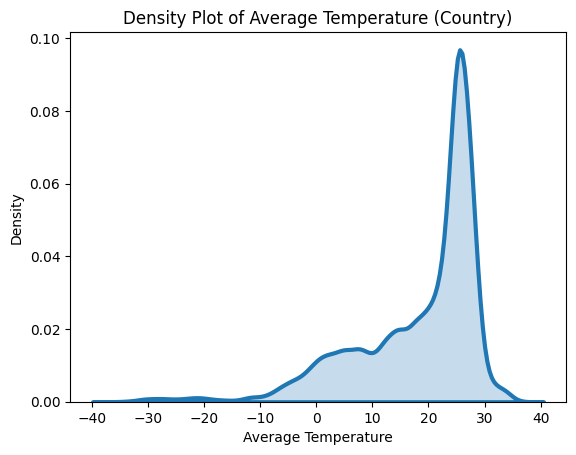

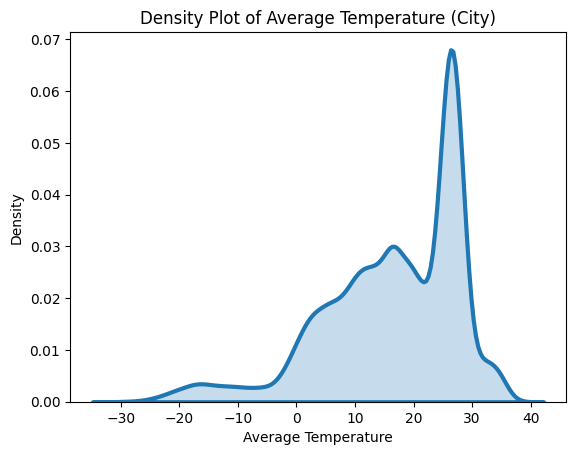

In [ ]:
# Normal distribution for the 'AverageTemperature' column in the Country dataset
sns.kdeplot(df_country['AverageTemperature'].dropna(), fill=True, linewidth=3)
plt.title('Density Plot of Average Temperature (Country)')
plt.xlabel('Average Temperature')
plt.ylabel('Density')
plt.show()

# Normal distribution for the 'AverageTemperature' column in the City dataset
sns.kdeplot(df_city['AverageTemperature'].dropna(), fill=True, linewidth=3)
plt.title('Density Plot of Average Temperature (City)')
plt.xlabel('Average Temperature')
plt.ylabel('Density')
plt.show()

The `seaborn.kdeplot` function is used to create a Kernel Density Estimation (KDE) plot, which provides an estimate of the underlying probability density function.

The resulting plots show the shape of the distribution and provide insights into the typical range and variability of average temperatures in both the Country and City datasets.

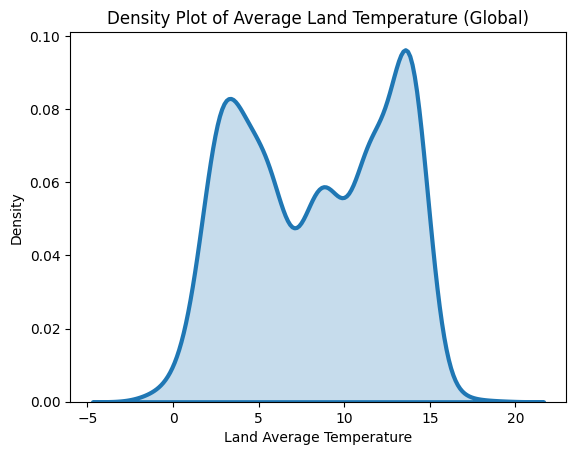

In [ ]:
# Normal distribution plot for the 'LandAverageTemperature' column in the Global dataset
sns.kdeplot(df_global['LandAverageTemperature'].dropna(), fill=True, linewidth=3)
plt.title('Density Plot of Average Land Temperature (Global)')
plt.xlabel('Land Average Temperature')
plt.ylabel('Density')
plt.show()

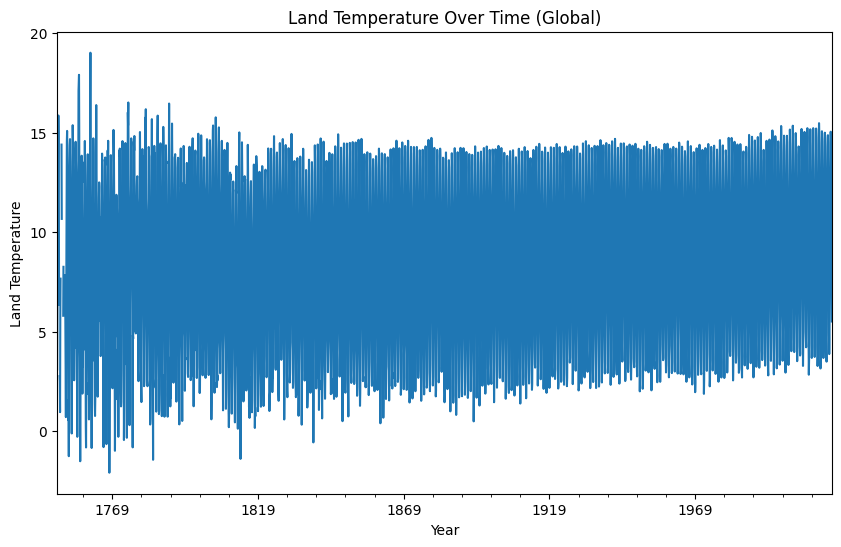

In [ ]:
# Line Chart: Trend of land temperature over time in the Global dataset

df_global['dt'] = pd.to_datetime(df_global['dt']) # Convert the 'dt' column to datetime format
df_global.set_index('dt', inplace=True) # Set the 'dt' column as the index of the DataFrame

plt.figure(figsize=(10, 6))
df_global['LandAverageTemperature'].plot()
plt.title('Land Temperature Over Time (Global)')
plt.xlabel('Year')
plt.ylabel('Land Temperature')
plt.show()

 The resulting line chart provides insights into the long-term trends in land temperature on a global scale.

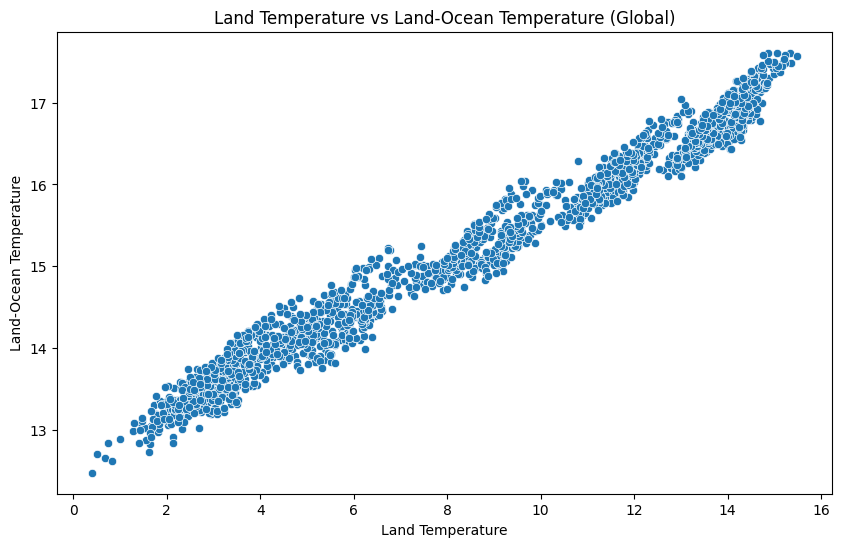

In [ ]:
# Scatter Plot: Relationship between land temperature and land-ocean temperature in the Global dataset

plt.figure(figsize=(10, 6))
sns.scatterplot(x='LandAverageTemperature', y='LandAndOceanAverageTemperature', data=df_global)
plt.title('Land Temperature vs Land-Ocean Temperature (Global)')
plt.xlabel('Land Temperature')
plt.ylabel('Land-Ocean Temperature')
plt.show()

The resulting scatter plot provides insights into the correlation or relationship between land temperature and land-ocean temperature in the global context.

In [ ]:
# # Histogram: Frequency distribution of land temperature in the Global dataset

# plt.figure(figsize=(10, 6))
# sns.histplot(df_global['LandAverageTemperature'].dropna(), kde=True)
# plt.title('Distribution of Land Temperature (Global)')
# plt.xlabel('Land Temperature')
# plt.ylabel('Frequency')
# plt.show()

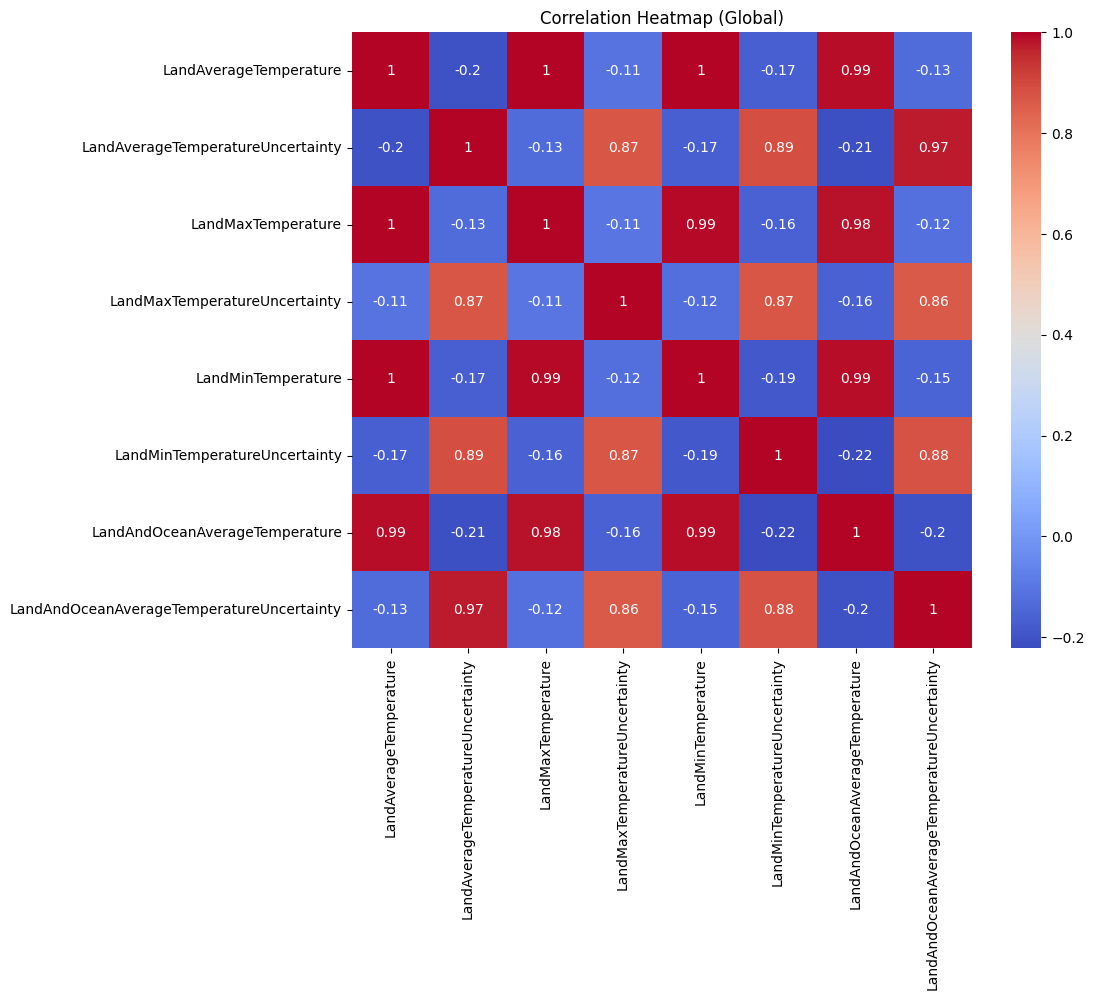

In [ ]:
# Heatmap: Correlation between land temperature and other climate variables in the Global dataset
corr_matrix = df_global.corr() # Calculate the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Global)')
plt.show()

The resulting heatmap provides a visual representation of the correlation between land temperature and other climate variables in the Global dataset.

In [ ]:
# # Line Chart - Average Temperature by Year for a Specific Country:
# country_name = 'Italy'  # Replace with the desired country name
# df_country_selected = df_country[df_country['Country'] == country_name]
# df_country_selected['Year'] = pd.to_datetime(df_country_selected['dt']).dt.year
# average_temp_by_year = df_country_selected.groupby('Year')['AverageTemperature'].mean()

# plt.figure(figsize=(10, 6))
# average_temp_by_year.plot(kind='line', marker='o')
# plt.title('Average Temperature by Year - {}'.format(country_name))
# plt.xlabel('Year')
# plt.ylabel('Average Temperature')
# plt.show()

In [ ]:
# # Line Chart - Average Temperature by Year for a Specific Country:
# country_name = 'Iran'  # Replace with the desired country name
# df_country_selected = df_country[df_country['Country'] == country_name]
# df_country_selected['Year'] = pd.to_datetime(df_country_selected['dt']).dt.year
# average_temp_by_year = df_country_selected.groupby('Year')['AverageTemperature'].mean()

# plt.figure(figsize=(10, 6))
# average_temp_by_year.plot(kind='line', marker='o')
# plt.title('Average Temperature by Year - {}'.format(country_name))
# plt.xlabel('Year')
# plt.ylabel('Average Temperature')
# plt.show()

<ipython-input-9-ea7f347b1353>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_selected['Year'] = pd.to_datetime(df_country_selected['dt']).dt.year
<ipython-input-9-ea7f347b1353>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_selected['Year'] = pd.to_datetime(df_country_selected['dt']).dt.year


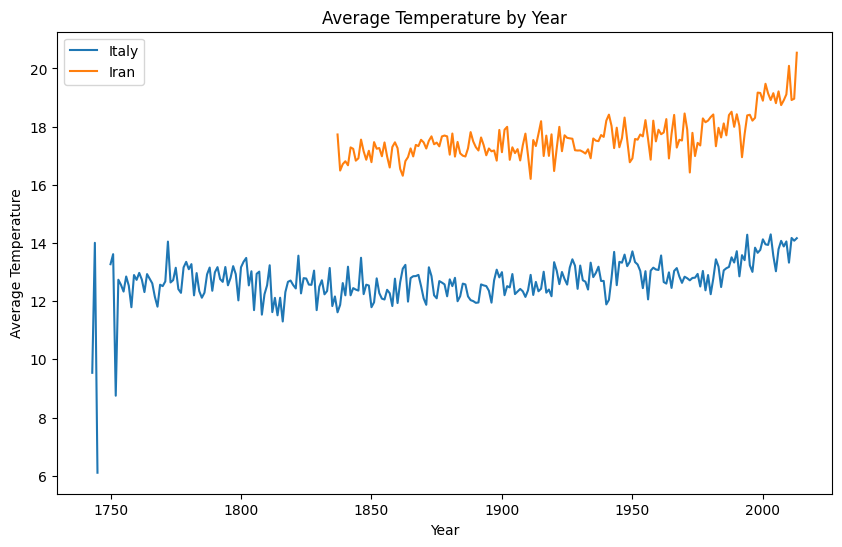

In [ ]:
# Comparative Line Plots for Italy and Iran
plt.figure(figsize=(10, 6))
for country in ['Italy', 'Iran']: # Looping through countries
    df_country_selected = df_country[df_country['Country'] == country]
    df_country_selected['Year'] = pd.to_datetime(df_country_selected['dt']).dt.year
    average_temp_by_year = df_country_selected.groupby('Year')['AverageTemperature'].mean()
    plt.plot(average_temp_by_year.index, average_temp_by_year, label=country)
plt.title('Average Temperature by Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()

The resulting plot showcases the average temperature trends over the years for Italy and Iran, allowing for a visual comparison of temperature variations between the two countries.

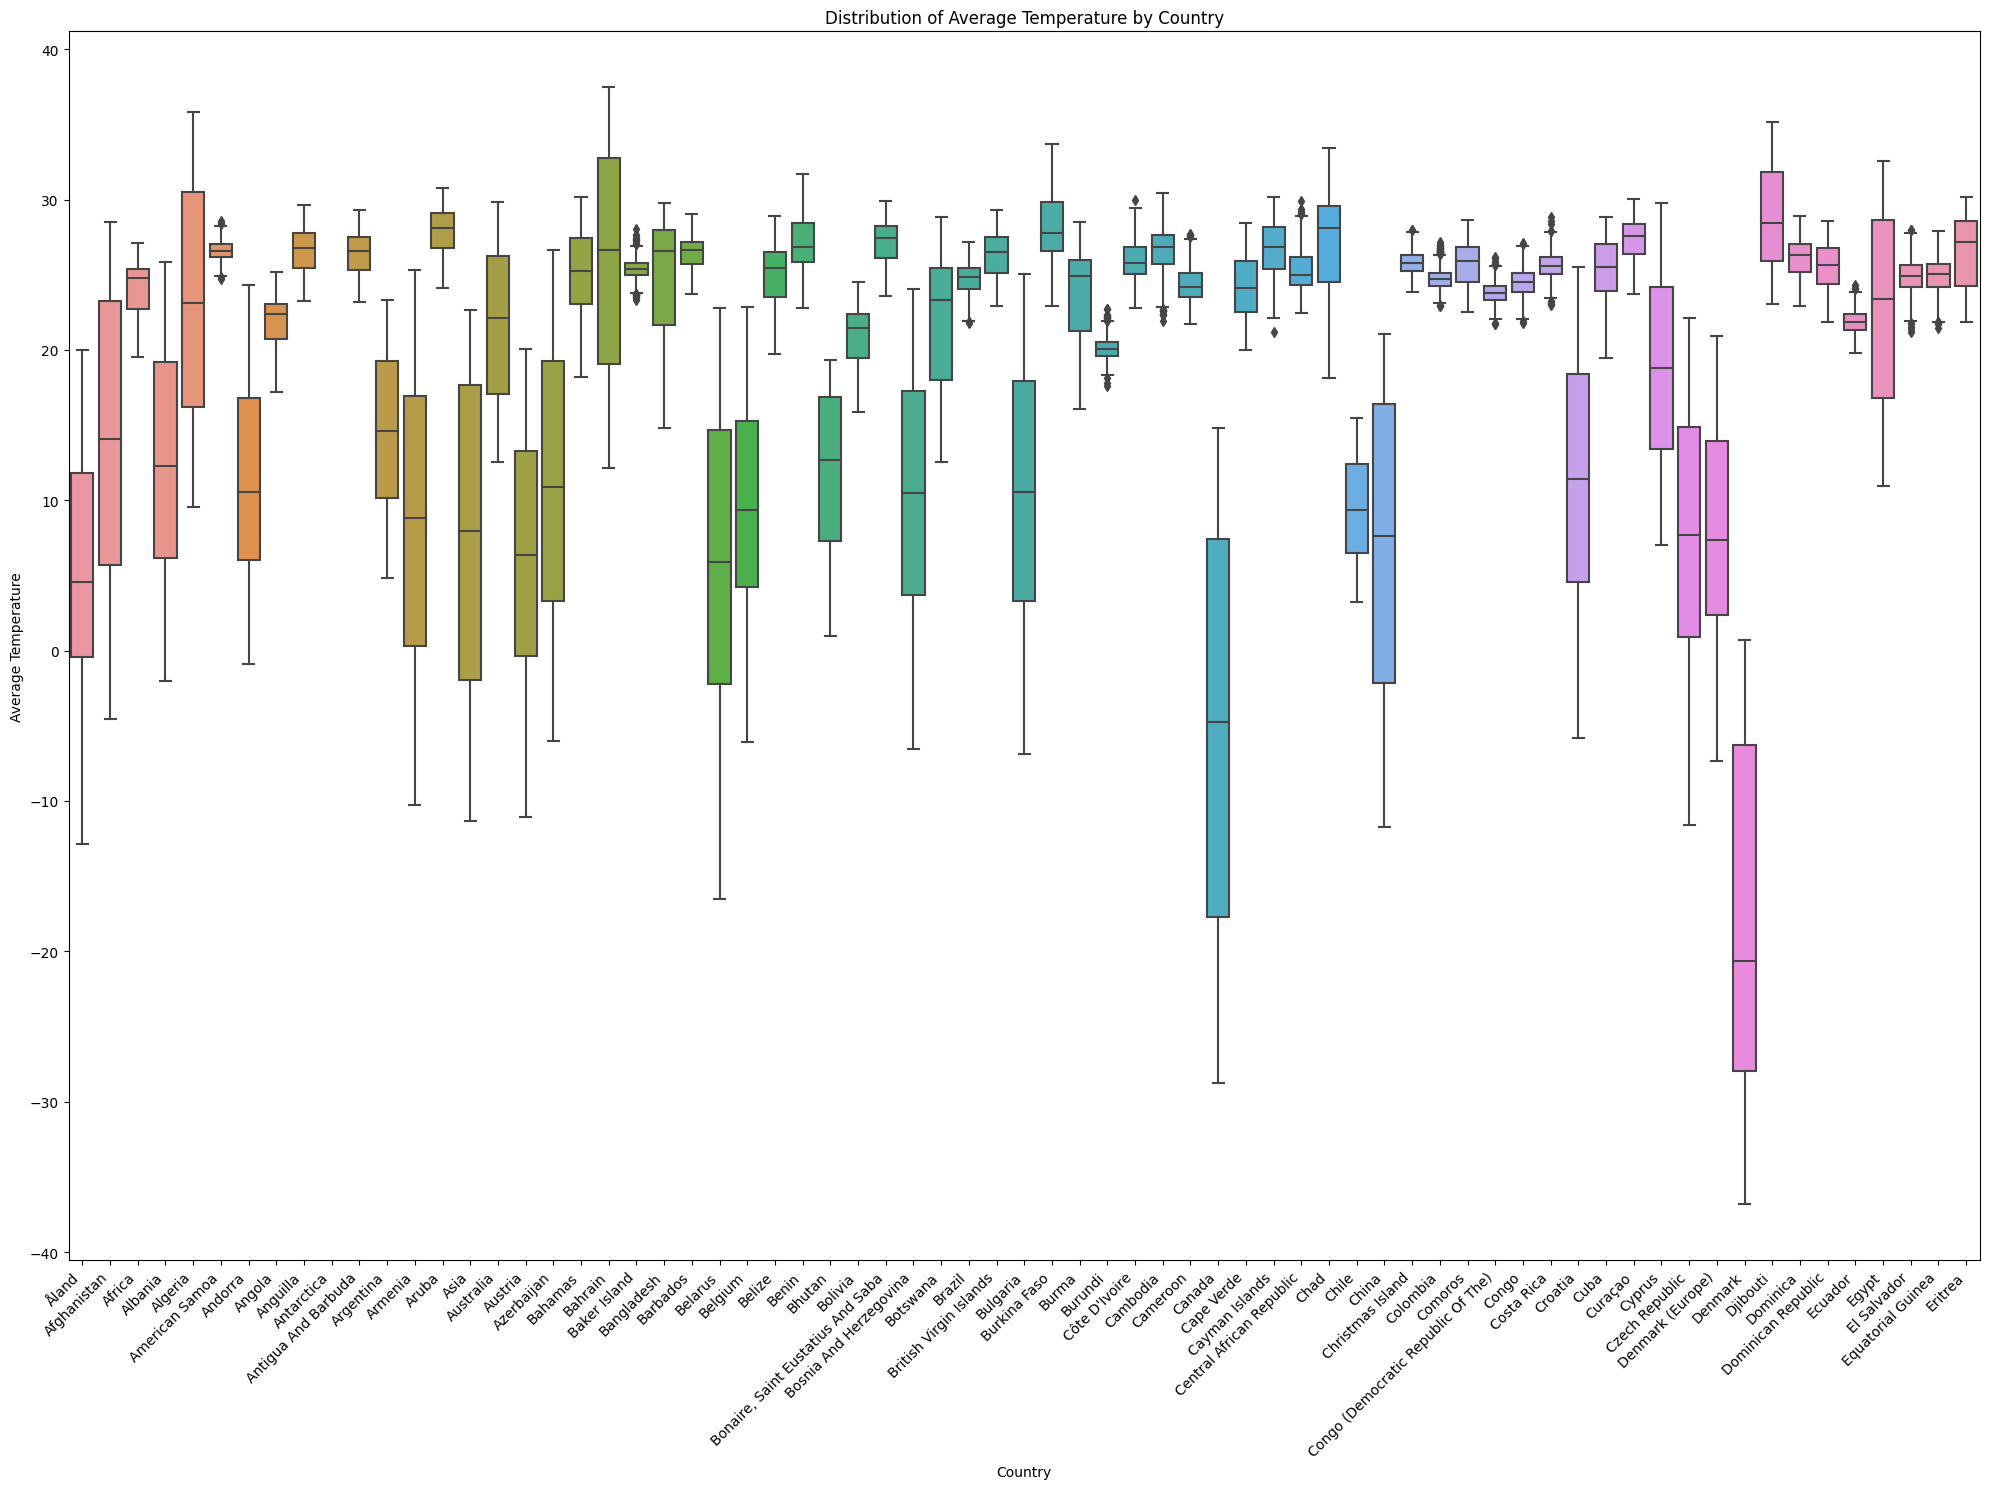

In [ ]:
# Boxplot: Distribution of average temprature by country

plt.figure(figsize=(20, 15))  # Increase the figure size
sns.boxplot(x='Country', y='AverageTemperature', data=df_country)
plt.title('Distribution of Average Temperature by Country')
plt.xlabel('Country')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align the x-axis labels
plt.tight_layout()  # Adjust the layout for better spacing
plt.show()

The resulting plot provides a visual representation of the distribution of average temperatures for different countries.

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


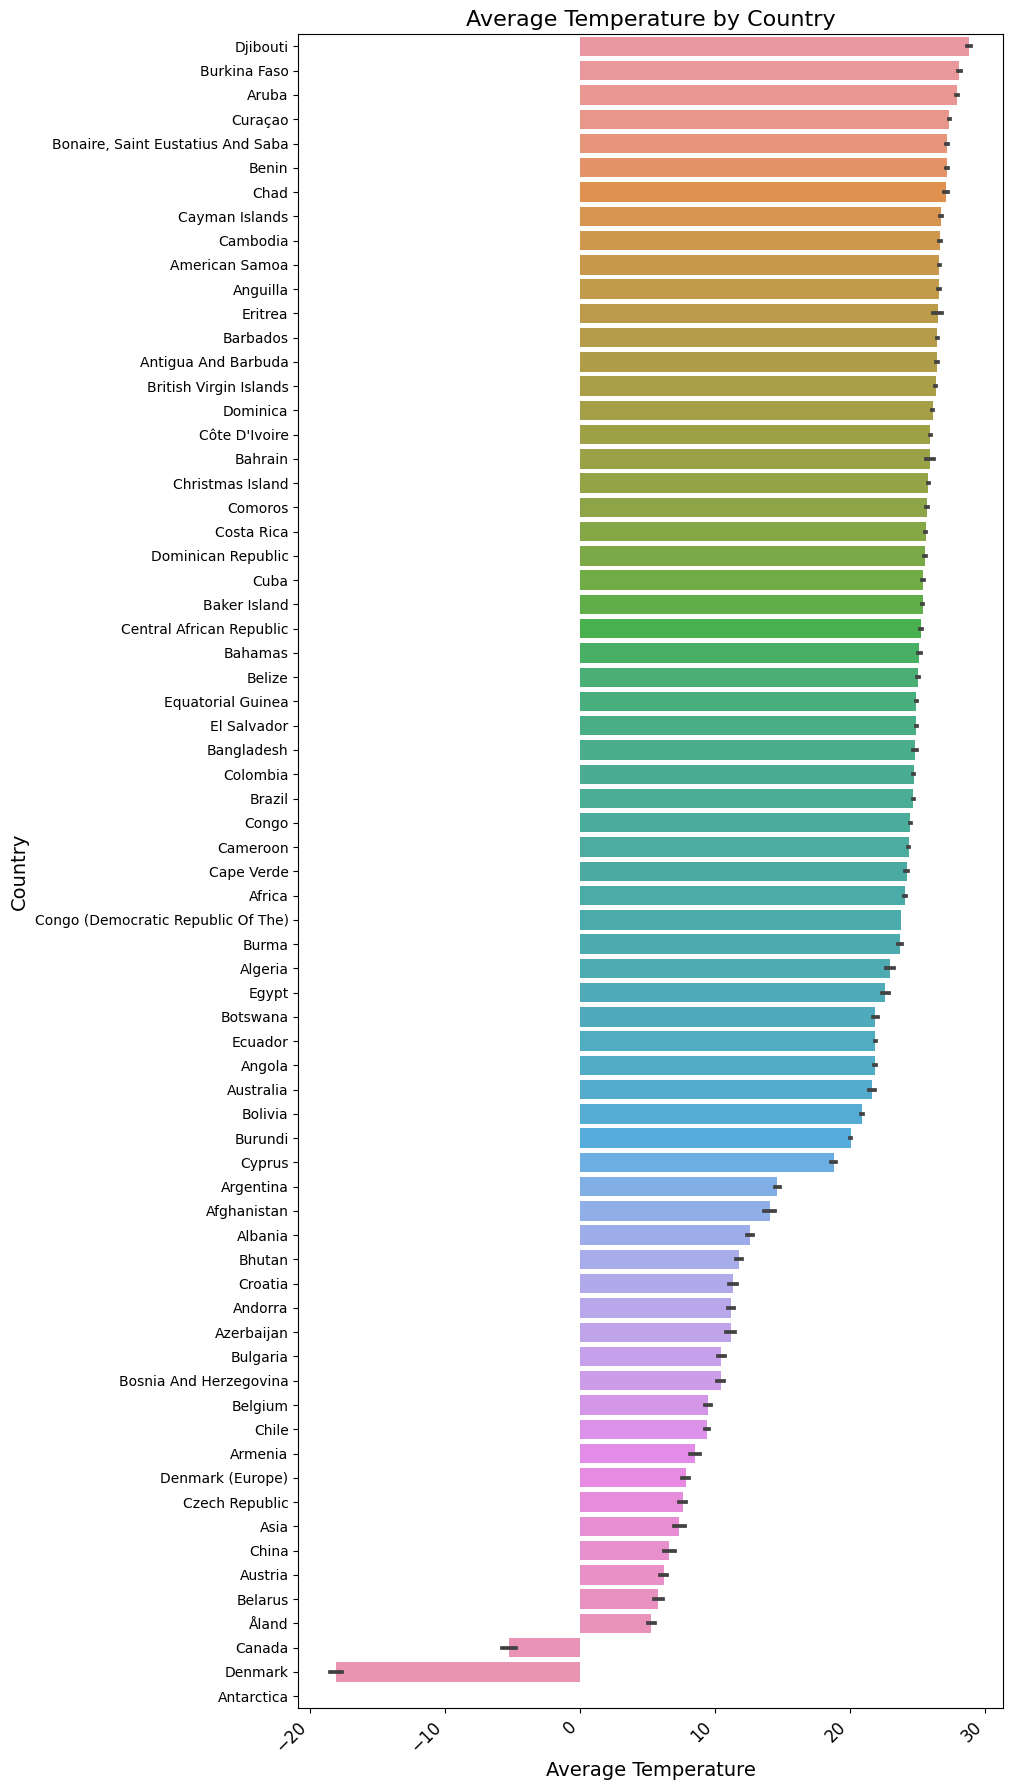

In [ ]:
# Average Temp by Country

plt.figure(figsize=(12, 18))

sns.barplot(x='AverageTemperature', y='Country', data=df_country, order=df_country.groupby('Country')['AverageTemperature'].mean().sort_values(ascending=False).index)

plt.title('Average Temperature by Country', fontsize=16)
plt.xlabel('Average Temperature', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12) # Rotate the x-axis tick labels by 45 degrees for better readability.
plt.yticks(fontsize=10) # Set the font size of the x-axis tick labels to 12 and the y-axis tick labels to 10.
plt.tight_layout()
plt.subplots_adjust(left=0.4) # Adjust spacing between the bars
plt.show()

The resulting bar plot provides a visual representation of the average temperature for each country, allowing for easy comparison and identification of countries with higher or lower average temperatures.

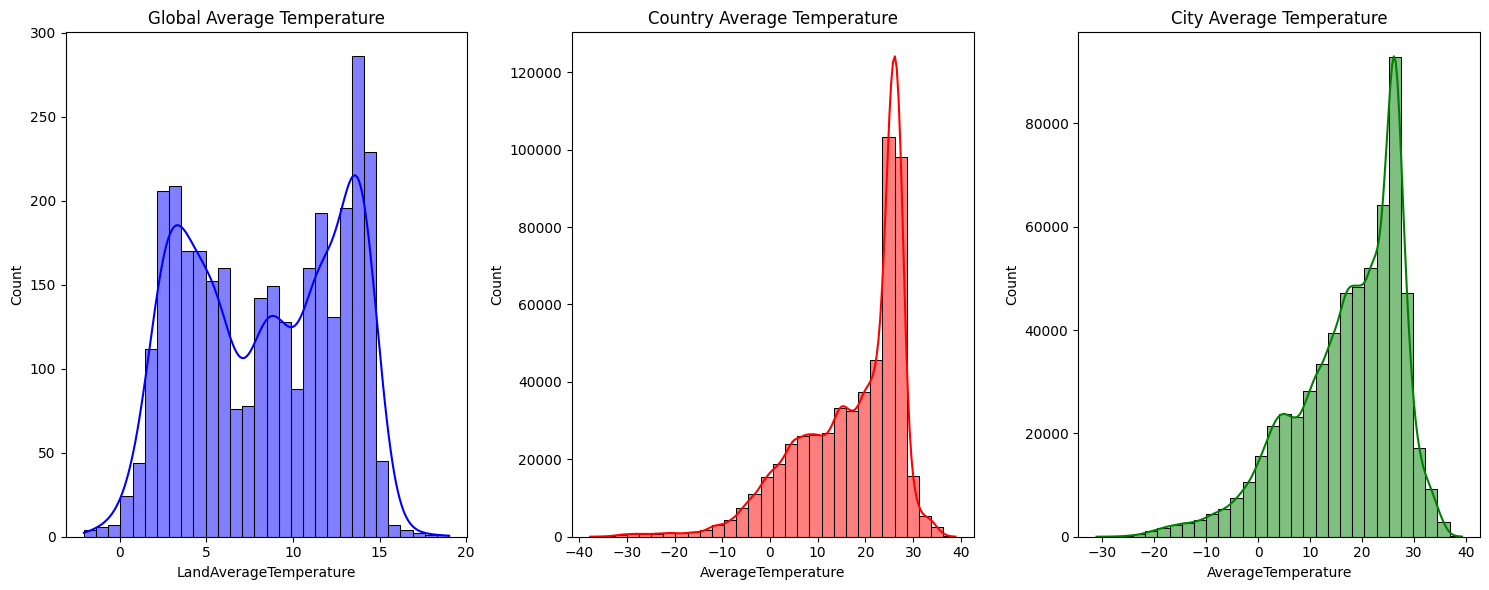

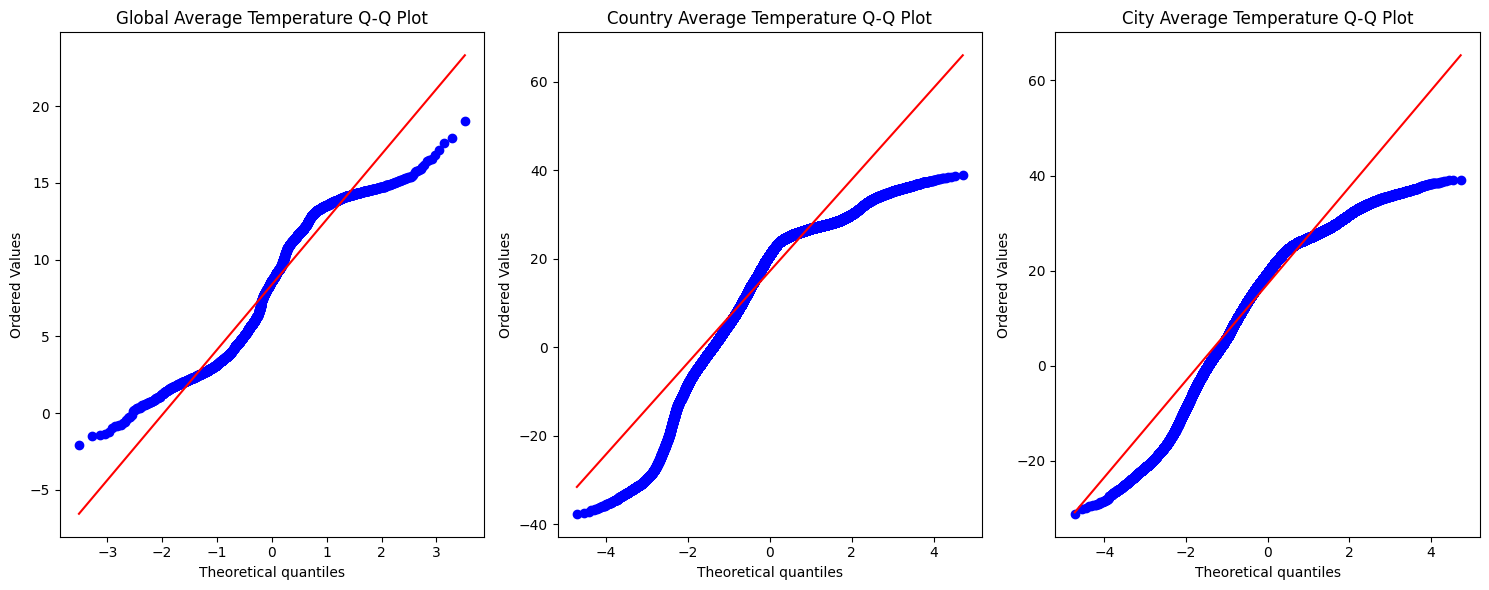

In [ ]:
# Histograms of Global, Country and City Average Temperatures
plt.figure(figsize=(15, 6))
plt.subplot(131)
sns.histplot(df_global['LandAverageTemperature'].dropna(), kde=True, color='b', bins=30)
plt.title('Global Average Temperature')

plt.subplot(132)
sns.histplot(df_country['AverageTemperature'].dropna(), kde=True, color='r', bins=30)
plt.title('Country Average Temperature')

plt.subplot(133)
sns.histplot(df_city['AverageTemperature'].dropna(), kde=True, color='g', bins=30)
plt.title('City Average Temperature')
plt.tight_layout()
plt.show()

# Check normality with Q-Q plot
import scipy.stats as stats
plt.figure(figsize=(15, 6))
plt.subplot(131)
stats.probplot(df_global['LandAverageTemperature'].dropna(), dist="norm", plot=plt)
plt.title('Global Average Temperature Q-Q Plot')

plt.subplot(132)
stats.probplot(df_country['AverageTemperature'].dropna(), dist="norm", plot=plt)
plt.title('Country Average Temperature Q-Q Plot')

plt.subplot(133)
stats.probplot(df_city['AverageTemperature'].dropna(), dist="norm", plot=plt)
plt.title('City Average Temperature Q-Q Plot')
plt.tight_layout()
plt.show()

The `dropna()` method is applied to remove any missing values in the respective average temperature columns.

The lines in the histograms represent the KDE plot, which is an estimation of the underlying probability density function of the variable being plotted. It provides a smoother representation of the distribution and helps to visualize the shape and patterns in the data.

Q-Q plots are useful for visually inspecting if the data deviates from a theoretical distribution. If the data points in the Q-Q plot fall roughly along a straight line, it suggests that the dataset follows the theoretical distribution. Any deviations from the straight line indicate departures from the expected distribution.

The histograms provide insights into the distribution of average temperatures in each dataset, while the Q-Q plots compare the observed data to a theoretical normal distribution.

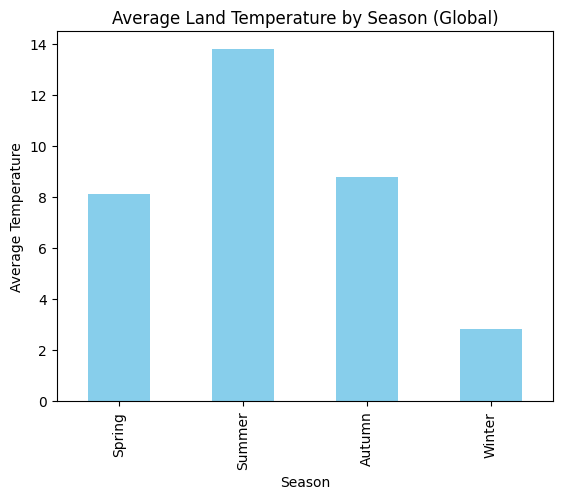

In [ ]:
# Seasonal Analysis for global data
df_global['Month'] = pd.to_datetime(df_global['dt']).dt.month
seasons = {12: 'Winter', 1: 'Winter', 2: 'Winter',
           3: 'Spring', 4: 'Spring', 5: 'Spring',
           6: 'Summer', 7: 'Summer', 8: 'Summer',
           9: 'Autumn', 10: 'Autumn', 11: 'Autumn'}
df_global['Season'] = df_global['Month'].map(seasons)
average_temp_by_season = df_global.groupby('Season')['LandAverageTemperature'].mean()

# Ensure the seasons are in the correct order
average_temp_by_season = average_temp_by_season[['Spring', 'Summer', 'Autumn', 'Winter']]
average_temp_by_season.plot(kind='bar', color='skyblue')
plt.title('Average Land Temperature by Season (Global)')
plt.xlabel('Season')
plt.ylabel('Average Temperature')
plt.show()

This analysis helps visualize the average land temperature by season on a global scale. It provides insights into the temperature variations throughout the year, highlighting the differences between seasons.

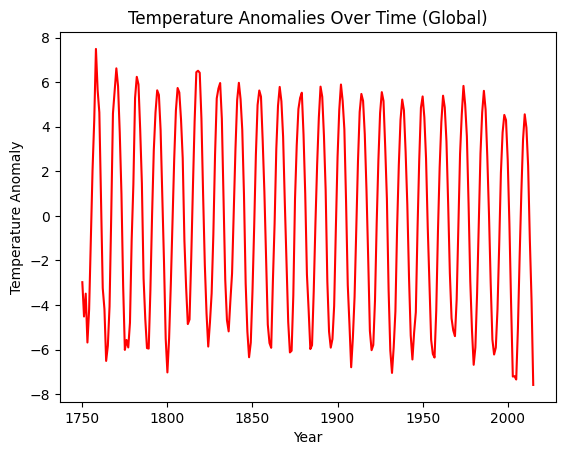

In [ ]:
# Temperature Anomalies for global data
df_global['Year'] = pd.to_datetime(df_global['dt']).dt.year
long_term_avg = df_global.groupby('Year')['LandAverageTemperature'].mean()
df_global['TempAnomaly'] = df_global['LandAverageTemperature'] - long_term_avg
df_global['TempAnomaly'].plot(color='red')
plt.title('Temperature Anomalies Over Time (Global)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.show()

This analysis allows us to observe the deviations of land temperature from the long-term average over time. Positive temperature anomalies indicate periods when the temperature was above the long-term average, while negative anomalies indicate periods when the temperature was below the long-term average.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# Make sure 'dt' is set as the index and is of datetime type
df_global['dt'] = pd.to_datetime(df_global['dt'])
df_global.set_index('dt', inplace=True)

# Resample data annually and reset index
df_global_annual = df_global['LandAverageTemperature'].resample('A').mean().reset_index()
df_global_annual['Year'] = df_global_annual['dt'].dt.year
X = df_global_annual['Year'].values.reshape(-1,1)
y = df_global_annual['LandAverageTemperature'].values.reshape(-1,1)

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Compare predictions with the actual values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df.head())

# Error Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Predict for future years
future_years = np.array(range(2024, 2031)).reshape(-1, 1)
future_temps = regressor.predict(future_years)
print(future_temps)

     Actual  Predicted
0  8.242417   8.611963
1  7.718667   8.086054
2  8.165417   8.527619
3  6.743583   7.763562
4  8.698333   8.651654
Mean Absolute Error: 0.32135630114862496
Mean Squared Error: 0.16967715987006707
Root Mean Squared Error: 0.4119188753505562
[[9.083296  ]
 [9.0882574 ]
 [9.09321881]
 [9.09818021]
 [9.10314162]
 [9.10810302]
 [9.11306443]]


A linear regression model is created using `LinearRegression()`, and the model is fitted to the training data using `fit(X_train, y_train)`.

Predictions are made on the testing data using `predict(X_test)`, and the predicted values are stored in 'y_pred'.

Error metrics are calculated to evaluate the performance of the model. The mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE) are computed using the corresponding functions from the 'metrics' module in scikit-learn.

 `np.array(range(2024, 2031)).reshape(-1, 1)` creates a 2-dimensional numpy array with 7 rows and 1 column, where each row represents a year from 2024 to 2030.

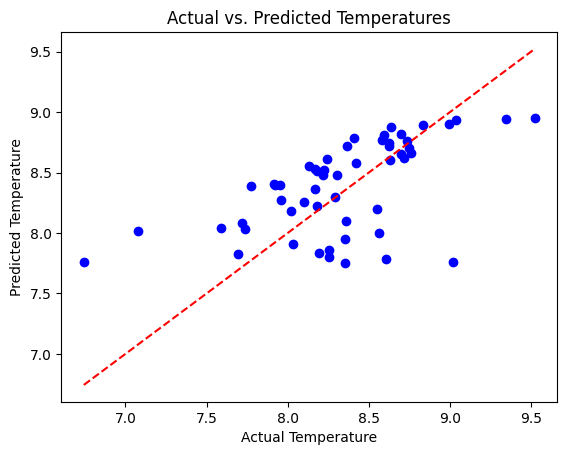

In [ ]:
# Compare predictions with the actual values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

# Scatter plot - Actual vs. Predicted Temperatures
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Temperatures')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.show()

Each point on the scatter plot represents a pair of actual and predicted temperatures for a specific data point.

The red line represents the ideal scenario where the actual and predicted temperatures perfectly match. Any points that fall on this line indicate a close match between the actual and predicted temperatures.

# **Here are the links to the documentation for each library used in the script:**


[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)

[NumPy Documentation](https://numpy.org/doc/stable/)

[Matplotlib Documentation](https://matplotlib.org/stable/users/index.html)

[Seaborn Documentation](https://seaborn.pydata.org/)

[Scikit-Learn Documentation](https://scikit-learn.org/stable/user_guide.html)

[StatsModels Documentation](https://www.statsmodels.org/stable/index.html)

[SciPy Documentation](https://docs.scipy.org/doc/scipy/reference/)